<a href="https://colab.research.google.com/github/skywalker0803r/Data-Analysis/blob/master/CNN_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web
df = web.DataReader('0050.tw',"yahoo",start="2002-01-01")

# 載入資料

In [2]:
print(df.head(3))
print(df.tail(3))

                 High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2007-12-31  61.700001  61.049999  61.450001  61.450001  2870000.0  50.982933
2008-01-02  61.299999  60.000000  60.099998  60.099998  4975000.0  49.862885
2008-01-03  59.349998  58.599998  59.099998  59.099998  7413000.0  49.033218
                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2019-09-04  82.199997  81.400002  81.449997  82.150002  10748771.0  82.150002
2019-09-05  83.199997  82.550003  82.550003  83.000000  25429390.0  83.000000
2019-09-06  83.550003  82.550003  82.550003  83.500000  17194000.0  83.500000


# Labeling(計算return)

count    2876.000000
mean        0.023752
std         1.624334
min       -11.922342
25%        -0.518362
50%         0.000000
75%         0.609987
max        19.945908
Name: return%, dtype: float64


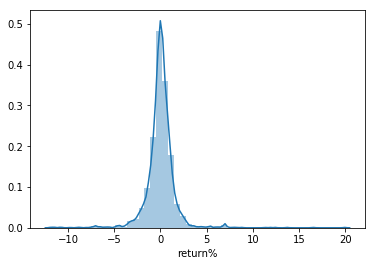

In [3]:
df['return%'] = ( (df['Close']/df['Close'].shift(1)) -1 )*100 #[(今天股價/昨天股價)-1]*100
print(df['return%'].describe())
sns.distplot(df['return%'].dropna())

# 計算技術指標RSI

count    2871.000000
mean       53.253256
std        25.498499
min         0.000000
25%        34.360715
50%        54.308057
75%        72.919139
max       100.000000
Name: RSI, dtype: float64


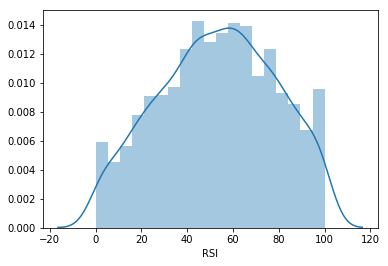

In [4]:
#計算絕對漲/跌幅
df['絕對漲幅'] = (df['Close']/df['Close'].shift(1))-1 #(今天股價/昨日股價)-1
df['絕對漲幅'][df['絕對漲幅']<0] = 0 #跌幅的部份歸0
df['絕對跌幅'] = (-1) * ((df['Close']/df['Close'].shift(1))-1) #-1 * ((今天股價/昨日股價)-1)#反向的絕對漲幅
df['絕對跌幅'][df['絕對跌幅']<0] = 0 #漲幅的部份歸0

#漲幅平滑
df['UPt'] = df['絕對漲幅'].rolling(6).mean()
df['DNt'] = df['絕對跌幅'].rolling(6).mean()

#計算RSI
df['RSI'] = 100 * df['UPt'] / (df['UPt']+df['DNt'])
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())

# 計算威廉指標

count    2869.000000
mean       44.536916
std        31.484913
min         0.000000
25%        14.705909
50%        41.176497
75%        74.074158
max       100.000000
Name: 威廉指標, dtype: float64


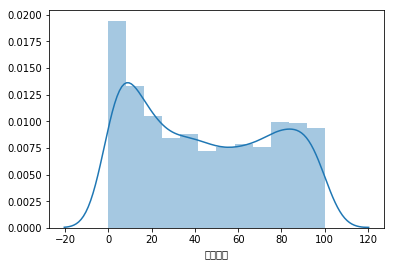

In [5]:
df['最近9日內最高價'] = df['High'].rolling(9).max()
df['最近9日內最低價'] = df['Low'].rolling(9).min()
df['威廉指標'] = (df['最近9日內最高價']-df['Close'])/(df['最近9日內最高價']-df['最近9日內最低價'])
df['威廉指標'] = df['威廉指標'] * 100
print(df['威廉指標'].describe())
sns.distplot(df['威廉指標'].dropna())

# 計算5日均線bias

count    2873.000000
mean        0.025998
std         1.505634
min       -12.935322
25%        -0.650237
50%         0.118045
75%         0.748594
max        10.419441
Name: 5日均bias, dtype: float64


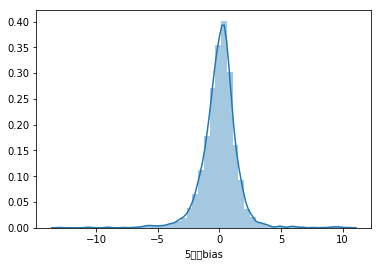

In [6]:
df['5日均'] = df['Close'].rolling(5).mean()
df['5日均bias'] = ((df['Close'] - df['5日均']) / df['5日均'])*100
print(df['5日均bias'].describe())
sns.distplot(df['5日均bias'].dropna())

# 計算十日均線bias

count    2868.000000
mean        0.062815
std         2.114597
min       -18.756241
25%        -0.980779
50%         0.201425
75%         1.256370
max        12.746320
Name: 10日均bias, dtype: float64


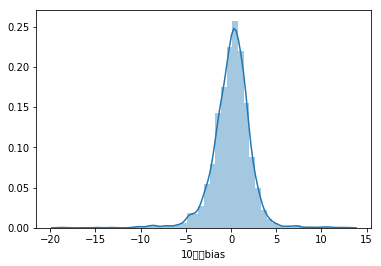

In [7]:
df['10日均'] = df['Close'].rolling(10).mean()
df['10日均bias'] = ((df['Close'] - df['10日均']) / df['10日均'])*100
print(df['10日均bias'].describe())
sns.distplot(df['10日均bias'].dropna())

# 計算5日均和10日均bias

count    2868.000000
mean        0.029631
std         1.116624
min        -7.963148
25%        -0.520395
50%         0.107785
75%         0.662740
max         6.807571
Name: 5-10_bias, dtype: float64


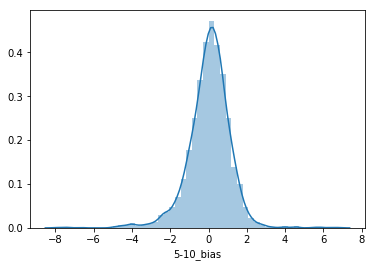

In [8]:
df['5-10_bias'] = ((df['5日均'] - df['10日均']) / df['10日均'])*100
print(df['5-10_bias'].describe())
sns.distplot(df['5-10_bias'].dropna())

# columns選取

In [9]:
df = df.dropna(axis=0)#刪除有缺失的row,rolling導致
features = ['RSI','威廉指標','5日均bias','10日均bias','5-10_bias']
labels = ['return%']
df = df[features+labels]
df.head()

,RSI,威廉指標,5日均bias,10日均bias,5-10_bias,return%
Date,,,,,,
2008-01-14,48.202437,46.296316,1.624609,0.435561,-1.170039,1.994792
2008-01-15,93.464266,8.849561,4.038853,4.350054,0.299120,3.826531
2008-01-16,60.785755,55.752194,-0.612660,0.111428,0.728551,-4.340701
2008-01-17,52.002582,60.176975,-1.122257,-0.154531,0.978709,-0.428082
2008-01-18,55.259265,53.982309,-0.813836,0.550016,1.375042,0.601889


# 相關性分析

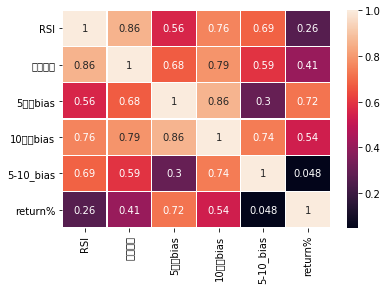

In [10]:
import seaborn as sns
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# Xs ,ys prepare

In [11]:
from tqdm import tqdm
import numpy as np
from sklearn.preprocessing import scale

#定義觀察天數,起始index,結束index
days = 7
b_index = 0
f_index = len(df)-days

#特徵欄位
features = df.drop('return%',axis=1).columns.tolist()

#目標名稱
y_name = 'return%'

#待存放序列
Xs = []
ys = []
indexs = []

for i in tqdm(range(b_index,f_index,days)):
  X = df.iloc[i:i+days,:][features]#取i:i+days這段時間的features(不包括i+days這一天),例如0,1,2...14日這些日期的features
  y = df.iloc[i+days:i+days+1,:][y_name]#取i+days這一天的y_name,例如第15日y_name
  X = scale(np.array(X))#特徵轉成array後再做scaling
  indexs.append((i,i+days))
  Xs.append(X)#加入一筆X
  ys.append(y)#加入一筆y
#轉換
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 409/409 [00:00<00:00, 446.15it/s]

準備完成


# check

In [12]:
print('資料筆數:',len(df))
print('第一筆的index開始和結束',indexs[0])
print('最後一筆的index開始和結束',indexs[-1])

資料筆數: 2868
第一筆的index開始和結束 (0, 7)
最後一筆的index開始和結束 (2856, 2863)


# Reshape X

(圖片數量,長,寬,1張)

In [13]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(409, 7, 5)
(409, 7, 5, 1)


# One hot encoding of label

原始y代表漲幅

In [14]:
print(ys.shape)
print(ys[:5])

(409, 1)
[[-0.186224  ]
 [ 2.63876386]
 [-1.89654909]
 [-2.79375019]
 [ 0.91514653]]


轉換成 漲或跌 的one_hot_array

In [15]:
from keras.utils.np_utils import to_categorical
r1 = (ys>0)
r2 = (ys<0)
ys[r1] = int(1)
ys[r2] = int(0)
ys = to_categorical(ys, num_classes = 2)
print(ys.shape)
print(ys[:5])

Using TensorFlow backend.


(409, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


# Visualization

In [16]:
print(Xs.shape)
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
print(Xs_v.shape)

(409, 7, 5, 1)
(409, 7, 5)


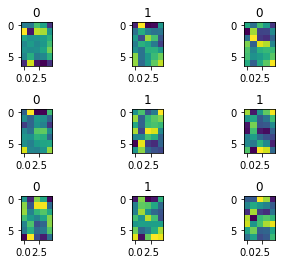

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

plt.subplots_adjust(wspace =0, hspace =1)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and validation sets

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(Xs,
                                              ys, 
                                              test_size=0.2,#切分比例
                                              random_state=0, #隨機種子
                                              shuffle=False,#是否洗牌
                                              stratify=None #是否根據y欄位做分層取樣
                                             )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(327, 7, 5, 1) (327, 2) (82, 7, 5, 1) (82, 2)


# 看一下樣本的label分布情況是否平均

In [19]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

0    213
1    196
dtype: int64

In [20]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

0    176
1    151
dtype: int64

In [21]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

1    45
0    37
dtype: int64

# CNN

In [0]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [23]:
model = Sequential()

dim1 = days #觀察時間
dim2 = len(features) #特徵數量
nclasses = 2 #漲或跌

#兩層conv+maxpool+dropout
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(dim1,dim2,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu',))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

#兩層conv+maxpool+dropout
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

#全連接層
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(nclasses, activation='softmax'))#分類輸出漲或跌
model.summary()

W0906 07:00:45.635155 140071122556800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0906 07:00:45.656291 140071122556800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0906 07:00:45.659395 140071122556800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0906 07:00:45.690287 140071122556800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0906 07:00:45.693387 140071122556800 deprecation_wrapp

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 7, 5, 32)          832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 5, 32)          25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 2, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 2, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 2, 64)          51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 2, 64)          102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

In [24]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

W0906 07:00:45.826944 140071122556800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0906 07:00:45.860473 140071122556800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



# 優化器

In [0]:
#1
lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                 patience=10, 
                                 verbose=1, 
                                 factor=0.5, 
                                 min_lr=0.000001)
#2
es = EarlyStopping(monitor='val_loss', #驗證集loss
                   min_delta=0, 
                   patience=30,  
                   mode='min',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [26]:
history = model.fit(xtrain,ytrain,
                    batch_size=100,
                    epochs=300,
                    validation_data=(xval,yval),
                    verbose=1,callbacks=[es])

W0906 07:00:45.988296 140071122556800 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 327 samples, validate on 82 samples
Epoch 1/300
327/327 [==============================] - 1s 2ms/step - loss: 0.6942 - acc: 0.4832 - val_loss: 0.6966 - val_acc: 0.4512
Epoch 2/300
327/327 [==============================] - 0s 600us/step - loss: 0.6889 - acc: 0.5382 - val_loss: 0.7091 - val_acc: 0.4512
Epoch 3/300
327/327 [==============================] - 0s 578us/step - loss: 0.6913 - acc: 0.5382 - val_loss: 0.7093 - val_acc: 0.4512
Epoch 4/300
327/327 [==============================] - 0s 598us/step - loss: 0.6881 - acc: 0.5321 - val_loss: 0.6950 - val_acc: 0.5366
Epoch 5/300
327/327 [==============================] - 0s 543us/step - loss: 0.6850 - acc: 0.5627 - val_loss: 0.6995 - val_acc: 0.5000
Epoch 6/300
327/327 [==============================] - 0s 556us/step - loss: 0.6803 - acc: 0.5535 - val_loss: 0.7196 - val_acc: 0.4268
Epoch 7/300
327/327 [==============================] - 0s 542us/step - loss: 0.6722 - acc: 0.5535 - val_loss: 0.7287 - val_acc: 0.5610
Epoch 8/300


# 訓練過程評估

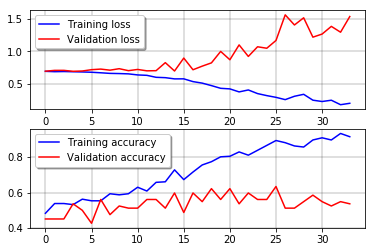

In [27]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

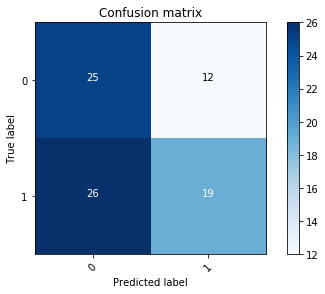

In [28]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [29]:
y_pred = model.predict(xval)#[[0.6,0.4],[0.4,0.6]]
y_pred = [np.argmax(i) for i in y_pred]#[0,1]
y_pred = to_categorical(y_pred, num_classes = 2)#[[1,0],[0,1]]
print(y_pred[:5])

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


真實y值

In [30]:
print(yval[:5])

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


分類報告

In [31]:
from sklearn.metrics import classification_report 
target_names = ['0','1']#漲跌
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

           0       0.49      0.68      0.57        37
           1       0.61      0.42      0.50        45

   micro avg       0.54      0.54      0.54        82
   macro avg       0.55      0.55      0.53        82
weighted avg       0.56      0.54      0.53        82
 samples avg       0.54      0.54      0.54        82



# plot error

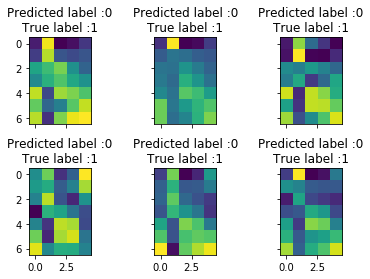

In [32]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)